# Titanic Project:
Problem Statement: The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# importing data set
df = pd.read_csv(r'C:\Users\Abhimanyu\Downloads\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.sample(10) 
# Checking random samples

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S


# Exploration Data Analysis

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* We can clearly see Nans present in the Age column and Cabin Column.
* We can see 177 missing values in Age column and 687 in case of cabin where we have to deal with it.
* Age values can be filled but Cabin values has more missing data filling those may imbalnce our model so we should drop that column.
* Embarked has only 2 missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we have 12 columns descripted as below -

* Passengerid (Datatype=integer) - ID number for Passenger ranging from 1 to 890

* Survived (Datatype=integer) - This is out target column

* Pclass (Datatype=integer) - Class in which passenger is travelling

* Name (Datatype=Object) - Name of Passenger

* Sex (Datatype=Object) - Sex(Male/Female)

* Age (Datatype=Float) - Age in years

* SibSp (Datatype=integer) - Wheter passenger has Sibiling or spouse

* Parch (Datatype=integer) - Parents or Childers of passnger

* Ticket (Datatype=Object) - Ticket ID

* Fare (Datatype=Float) - Fare in USD

* Cabin (Datatype=Object) - Cabin NO

* Embarked (Datatype=Object) - Post from which passenger is Embarked

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Here we can see that:**
* Total 38% passengers survived the Titanic accident Also their avg age is 30 years, 
* We have many missing values in our Age column, Min age of survived passnger is 0.42 years and maximum age of survived passenger is 80 years.
* Avg 52% of Passengers were having Siblings/Spouces outside the Titanic.
* Our Fare column has 0 min it means it has missing ir incorrect values.

In [8]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


# Data Visualization

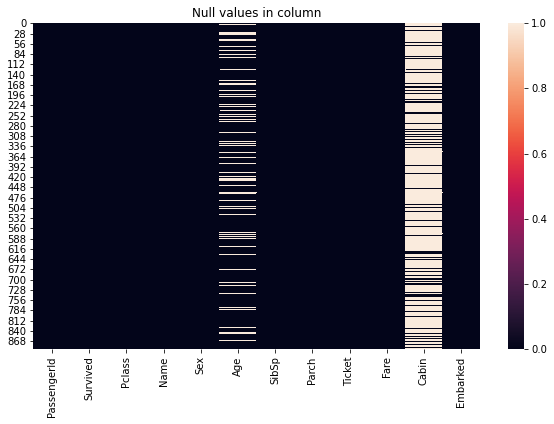

In [9]:
# Visual Representaion of missing values in cabin and Age column

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Null values in column")
plt.show()

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


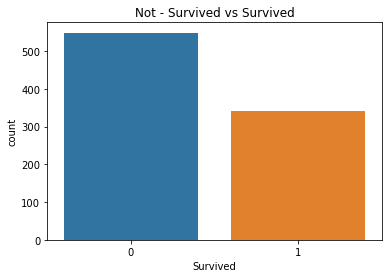

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# plotting graph of survived
sns.countplot(df['Survived'])
plt.title('Not - Survived vs Survived')
plt.show()

df['Survived'].value_counts()

We can see 549 passengers didnt survived whereas only 342 Passengers Survived

### Bar Charts: Plotting graphs for Features vs Target Variable

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

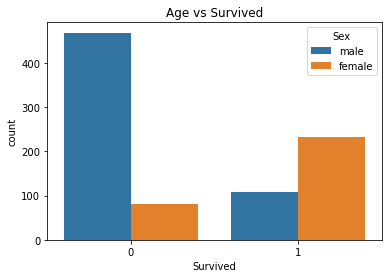

*Survived* :
 female    233
male      109
Name: Sex, dtype: int64

*Dead* :
 male      468
female     81
Name: Sex, dtype: int64


In [12]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Age vs Survived')
plt.show()

print("*Survived* :\n", df[df['Survived']==1] ['Sex'].value_counts())
print("\n*Dead* :\n", df[df['Survived']==0] ['Sex'].value_counts())

* Here we can see that Survival rate of female is higher than male where as Male has higher non-survival rate.

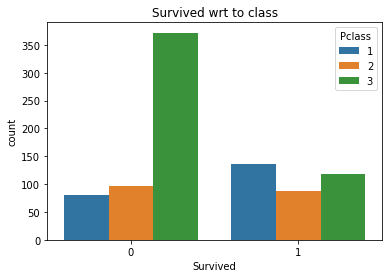

*Survived* :
 1    136
3    119
2     87
Name: Pclass, dtype: int64

*Dead* :
 3    372
2     97
1     80
Name: Pclass, dtype: int64


In [13]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Survived wrt to class')
plt.show()

print("*Survived* :\n", df[df['Survived']==1] ['Pclass'].value_counts())
print("\n*Dead* :\n", df[df['Survived']==0] ['Pclass'].value_counts())

* We can clearly see that Survivals rate is higher in Passenger class 1 (the premium class)
* Class 2 has moderate no of Survivals it is somehow balanced in terms of count.
* Class 3 has least no of survivers, being the least lesser premium class than other two.

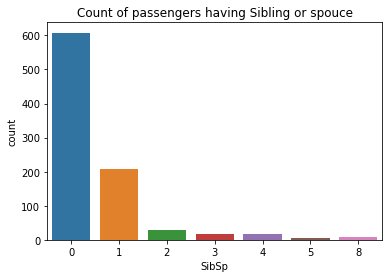

*Survived* :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

*Dead* :
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


In [14]:
sns.countplot(x='SibSp',data=df)
plt.title('Count of passengers having Sibling or spouce')
plt.show()

print("*Survived* :\n", df[df['Survived']==1] ['SibSp'].value_counts())
print("\n*Dead* :\n", df[df['Survived']==0] ['SibSp'].value_counts())

* We can see here around 600 passengers were not having any sibling or spouce onboard, whreas 200 passengers were having only one sibling or spouce further the count decreases for more siblings or spouce

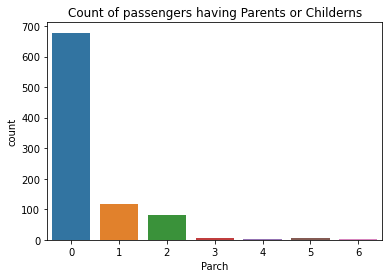

*Survived* :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

*Dead* :
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


In [15]:
sns.countplot(x='Parch',data=df)
plt.title('Count of passengers having Parents or Childerns')
plt.show()

print("*Survived* :\n", df[df['Survived']==1] ['Parch'].value_counts())
print("\n*Dead* :\n", df[df['Survived']==0] ['Parch'].value_counts())

* It is clear that around (445+233 = 678) passengers were not having parents/childrens onboard, whreas number is around (65+53 = 118) for the 1 parent/children and around 80 for 2 parent/children

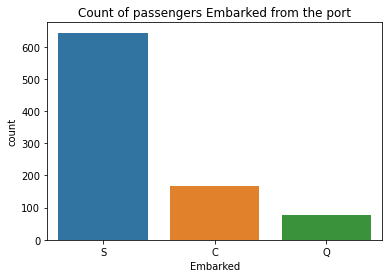

*Survived* :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64

*Dead* :
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


In [16]:
sns.countplot(x='Embarked',data=df)
plt.title('Count of passengers Embarked from the port')
plt.show()

print("*Survived* :\n", df[df['Survived']==1] ['Embarked'].value_counts())
print("\n*Dead* :\n", df[df['Survived']==0] ['Embarked'].value_counts())

* We can see that more number of passengers were Embarked from port S

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


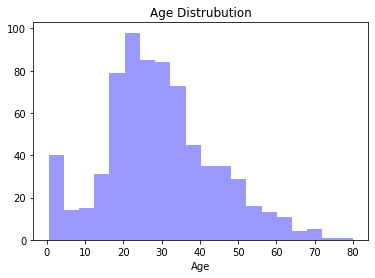

In [17]:
sns.distplot(df['Age'].dropna(),kde=False,color='blue')
plt.title('Age Distrubution')
plt.show()

* We can see We have more number of passngers from age 15 to 45

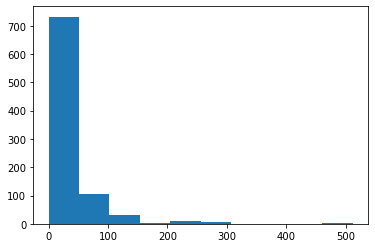

In [18]:
plt.hist(x="Fare",data=df,)
plt.show()

* We can see that Fares are high in the range 0 to 150

# Feature engineering

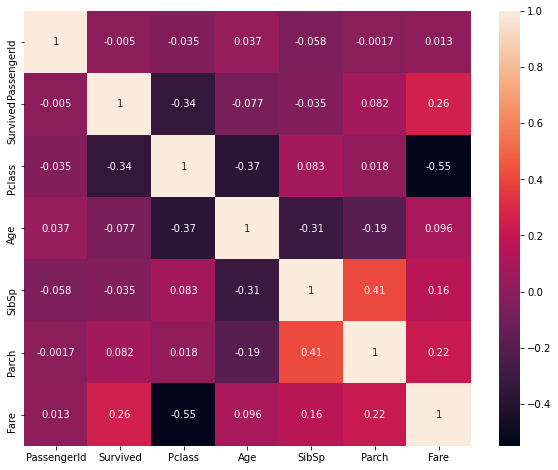

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

 * Here can see the stringest relation is negative correlatin between Pclass and fare but its not too much so we are not going to drop any of column for corrlation

* We need to fill NaNs present in our dataset. As Cabin has more than 77% of Nan we will drop that column. We can fill Nan present in Age and Embarked

In [20]:
df.drop('Cabin',axis = 1, inplace=True)

#### Filling NaNs present in the Age column by the mean.

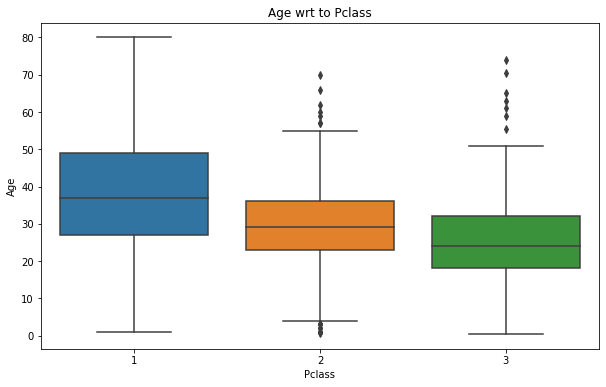

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Age wrt to Pclass')
plt.show()

* We are plotting age distrubution wrt to Pclass so we can fill Nans with respect to mean of respective class.
* We can take 38, 28 and 23 as respective ages for Pclass 1 , 2 and 3

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1 :
            return(32)
        
        if Pclass == 2 :
            return(28)
        if Pclass == 3:
            return(23)
        
        
    else:
        return Age

In [23]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

# We have fillaed the ages column with means of respective Pclass.  

**Our Embarked column has only 2 Nans so filling it with most commen value**

In [24]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

* We can see S is port where most passengers were Embarked

In [25]:
df['Embarked']=df['Embarked'].fillna('S')

In [26]:
# Checking for Nans after filling

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* Now we can see no null values in dataset.

In [27]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [28]:
df.shape

(891, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


* Here we can see Name, Sex, Ticket and Embarked are having Object datatype.
* Among them Name and ticket columns can be dropped as they doesnt have any relatinship with the target variable.
* We need to convert Sex and Embarked column into integers to train our model.

In [30]:
# Using LabelEncoder to Encode the Embarked and Sex column

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])

In [31]:
df['Sex']=le.fit_transform(df['Sex'])

In [32]:
print (df['Embarked'].sample(5),'-----------' ,df['Sex'].sample(5))

10     2
11     2
111    0
510    1
252    2
Name: Embarked, dtype: int32 ----------- 839    1
17     1
63     1
291    0
880    0
Name: Sex, dtype: int32


* Here we can see Embarked and Sex Columns are converted into integers.

In [33]:
#Let's have a look at our dataset again

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
668,669,0,3,"Cook, Mr. Jacob",1,43.0,0,0,A/5 3536,8.050,2
368,369,1,3,"Jermyn, Miss. Annie",0,23.0,0,0,14313,7.750,1
231,232,0,3,"Larsson, Mr. Bengt Edvin",1,29.0,0,0,347067,7.775,2
88,89,1,1,"Fortune, Miss. Mabel Helen",0,23.0,3,2,19950,263.000,2
369,370,1,1,"Aubart, Mme. Leontine Pauline",0,24.0,0,0,PC 17477,69.300,0


In [34]:
df.drop(df[['PassengerId','Name','Ticket']],axis = 1, inplace=True)

In [35]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
178,0,2,1,30.0,0,0,13.0000,2
557,0,1,1,32.0,0,0,227.5250,0
798,0,3,1,30.0,0,0,7.2292,0
887,1,1,0,19.0,0,0,30.0000,2
317,0,2,1,54.0,0,0,14.0000,2


In [36]:
df.shape

(891, 8)

In [37]:
# Dividing dataset into features and Taget
x = df.drop('Survived',axis=1)  # features
y = df['Survived']  # Target

In [38]:
# Features
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [39]:
# Target or Label
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
# Splitting data into for training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.28, random_state = 455)

# Model Bulding 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


print ('Accuracy =',accuracy_score(y_test, y_pred)*100,'%')
print ('\n Confusion Matrix','\n', confusion_matrix(y_test, y_pred))
print ('\n Classification Report', classification_report(y_test, y_pred))

Accuracy = 84.39999999999999 %

 Confusion Matrix 
 [[139  15]
 [ 24  72]]

 Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.88       154
           1       0.83      0.75      0.79        96

    accuracy                           0.84       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.84      0.84      0.84       250



C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

print ('Accuracy =',accuracy_score(y_test, y_pred)*100,'%')
print ('\n Confusion Matrix','\n', confusion_matrix(y_test, y_pred))
print ('\n Classification Report', classification_report(y_test, y_pred))

Accuracy = 64.8 %

 Confusion Matrix 
 [[139  15]
 [ 73  23]]

 Classification Report               precision    recall  f1-score   support

           0       0.66      0.90      0.76       154
           1       0.61      0.24      0.34        96

    accuracy                           0.65       250
   macro avg       0.63      0.57      0.55       250
weighted avg       0.64      0.65      0.60       250



In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print ('Accuracy =',accuracy_score(y_test, y_pred)*100,'%')
print ('\n Confusion Matrix','\n', confusion_matrix(y_test, y_pred))
print ('\n Classification Report', classification_report(y_test, y_pred))

Accuracy = 77.2 %

 Confusion Matrix 
 [[123  31]
 [ 26  70]]

 Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.81       154
           1       0.69      0.73      0.71        96

    accuracy                           0.77       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.77      0.77      0.77       250



In [44]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print ('Accuracy =',accuracy_score(y_test, y_pred)*100,'%')
print ('\n Confusion Matrix','\n', confusion_matrix(y_test, y_pred))
print ('\n Classification Report', classification_report(y_test, y_pred))

Accuracy = 73.6 %

 Confusion Matrix 
 [[102  52]
 [ 14  82]]

 Classification Report               precision    recall  f1-score   support

           0       0.88      0.66      0.76       154
           1       0.61      0.85      0.71        96

    accuracy                           0.74       250
   macro avg       0.75      0.76      0.73       250
weighted avg       0.78      0.74      0.74       250



In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print ('Accuracy =',accuracy_score(y_test, y_pred)*100,'%')
print ('\n Confusion Matrix','\n', confusion_matrix(y_test, y_pred))
print ('\n Classification Report', classification_report(y_test, y_pred))

Accuracy = 81.2 %

 Confusion Matrix 
 [[136  18]
 [ 29  67]]

 Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.79      0.70      0.74        96

    accuracy                           0.81       250
   macro avg       0.81      0.79      0.80       250
weighted avg       0.81      0.81      0.81       250



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)

print ('Accuracy =',accuracy_score(y_test, y_pred)*100,'%')
print ('\n Confusion Matrix','\n', confusion_matrix(y_test, y_pred))
print ('\n Classification Report', classification_report(y_test, y_pred))

Accuracy = 85.2 %

 Confusion Matrix 
 [[142  12]
 [ 25  71]]

 Classification Report               precision    recall  f1-score   support

           0       0.85      0.92      0.88       154
           1       0.86      0.74      0.79        96

    accuracy                           0.85       250
   macro avg       0.85      0.83      0.84       250
weighted avg       0.85      0.85      0.85       250



**Among all of the models GradientBoostingClassifier is giving highest accuracy so we are going to tune parametrs for that model**

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'max_features':['auto','sqrt','log'],
             'max_depth':[4,5,6,7,8],
             }

In [49]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5, scoring='accuracy')
GCV.fit(x_train,y_train)

GCV.best_params_

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 281, in _check_params
    raise ValueError("Invalid value for max_features: %r. "
ValueError: Invalid value for max_features: 'log'. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarnin

{'max_depth': 4, 'max_features': 'sqrt'}

In [50]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred)

0.856

**We dont see much improvement so going for RandomForest.**

In [51]:
parameters = {'max_features':['auto','sqrt','log'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [52]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring='accuracy')
GCV.fit(x_train,y_train)

GCV.best_params_

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_a

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [53]:
# predicting with best parameters
GCV_pred = GCV.best_estimator_.predict(x_test) 
accuracy_score(y_test,GCV_pred)

0.868

**We can see After tuuning parametrs for Random Forest we got accuracy of 86.8 %**

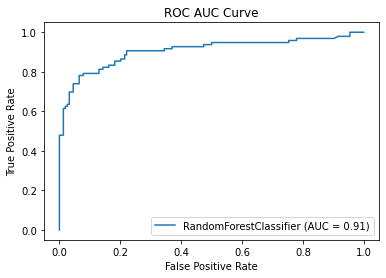

In [54]:
# Plotting ROC curve

from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

In [55]:
import joblib

joblib.dump(GCV.best_estimator_,"Titanic_project")

['Titanic_project']